In [6]:
import numpy as np


class SarsaAgent:
    def __init__(self, env):
        self.env = env
        self.alpha = 0.5  # 学习率
        self.gamma = 0.9  # 折扣因子
        self.epsilon = 0.1  # ε-greedy参数
        self.reset()

    def reset(self):
        # 初始化Q函数
        self.Q = {}
        for state in env.states():
            for action in env.actions():
                self.Q[(state, action)] = np.random.rand() * 0.1  # 小随机值初始化

    def get_action(self, state):
        # ε-greedy策略选择动作
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.env.actions())
        else:
            # 获取当前状态下所有动作的价值
            q_values = [self.Q[(state, action)] for action in self.env.actions()]
            # 选择价值最高的动作
            return np.argmax(q_values)

    def update(self, state, action, reward, next_state, next_action, done):
        if done:
            target = reward
        else:
            # SARSA更新公式：Q(s,a) = Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
            target = reward + self.gamma * self.Q[(next_state, next_action)]
        
        # 更新Q值
        self.Q[(state, action)] += self.alpha * (target - self.Q[(state, action)])

    def get_policy(self):
        policy = {}
        for state in self.env.states():
            if state == env.goal_state or state in env.wall_state:
                continue
            
            # 创建动作概率分布
            probs = {}
            q_values = [self.Q[(state, action)] for action in self.env.actions()]
            max_action = np.argmax(q_values)
            
            for action in self.env.actions():
                if action == max_action:
                    probs[action] = 1.0 - self.epsilon + self.epsilon/len(self.env.actions())
                else:
                    probs[action] = self.epsilon/len(self.env.actions())
                    
            policy[state] = probs
        
        return policy

    def get_value_function(self):
        V = {}
        for state in self.env.states():
            if state == env.goal_state or state in env.wall_state:
                V[state] = 0
                continue
            
            # 获取所有动作的Q值
            q_values = [self.Q[(state, action)] for action in self.env.actions()]
            # 状态价值是最大Q值
            V[state] = np.max(q_values)
        
        return V


Episode 0: total reward = -1.0, steps = 855
Episode 100: total reward = 2.0, steps = 49
Episode 200: total reward = 2.0, steps = 37
Episode 300: total reward = 2.0, steps = 35
Episode 400: total reward = 2.0, steps = 34
Episode 500: total reward = 2.0, steps = 39
Episode 600: total reward = 2.0, steps = 35
Episode 700: total reward = 2.0, steps = 36
Episode 800: total reward = 2.0, steps = 39
Episode 900: total reward = 2.0, steps = 37
Episode 1000: total reward = 2.0, steps = 42
Episode 1100: total reward = 2.0, steps = 35
Episode 1200: total reward = 2.0, steps = 33
Episode 1300: total reward = 2.0, steps = 33
Episode 1400: total reward = 2.0, steps = 33
Episode 1500: total reward = 2.0, steps = 36
Episode 1600: total reward = 2.0, steps = 35
Episode 1700: total reward = 2.0, steps = 46
Episode 1800: total reward = 2.0, steps = 38
Episode 1900: total reward = 2.0, steps = 42
{(0, 0): 0.012042073813911128, (0, 1): 0.011557544434913632, (0, 2): 0, (0, 3): 0, (0, 4): 0, (0, 5): 0.015159

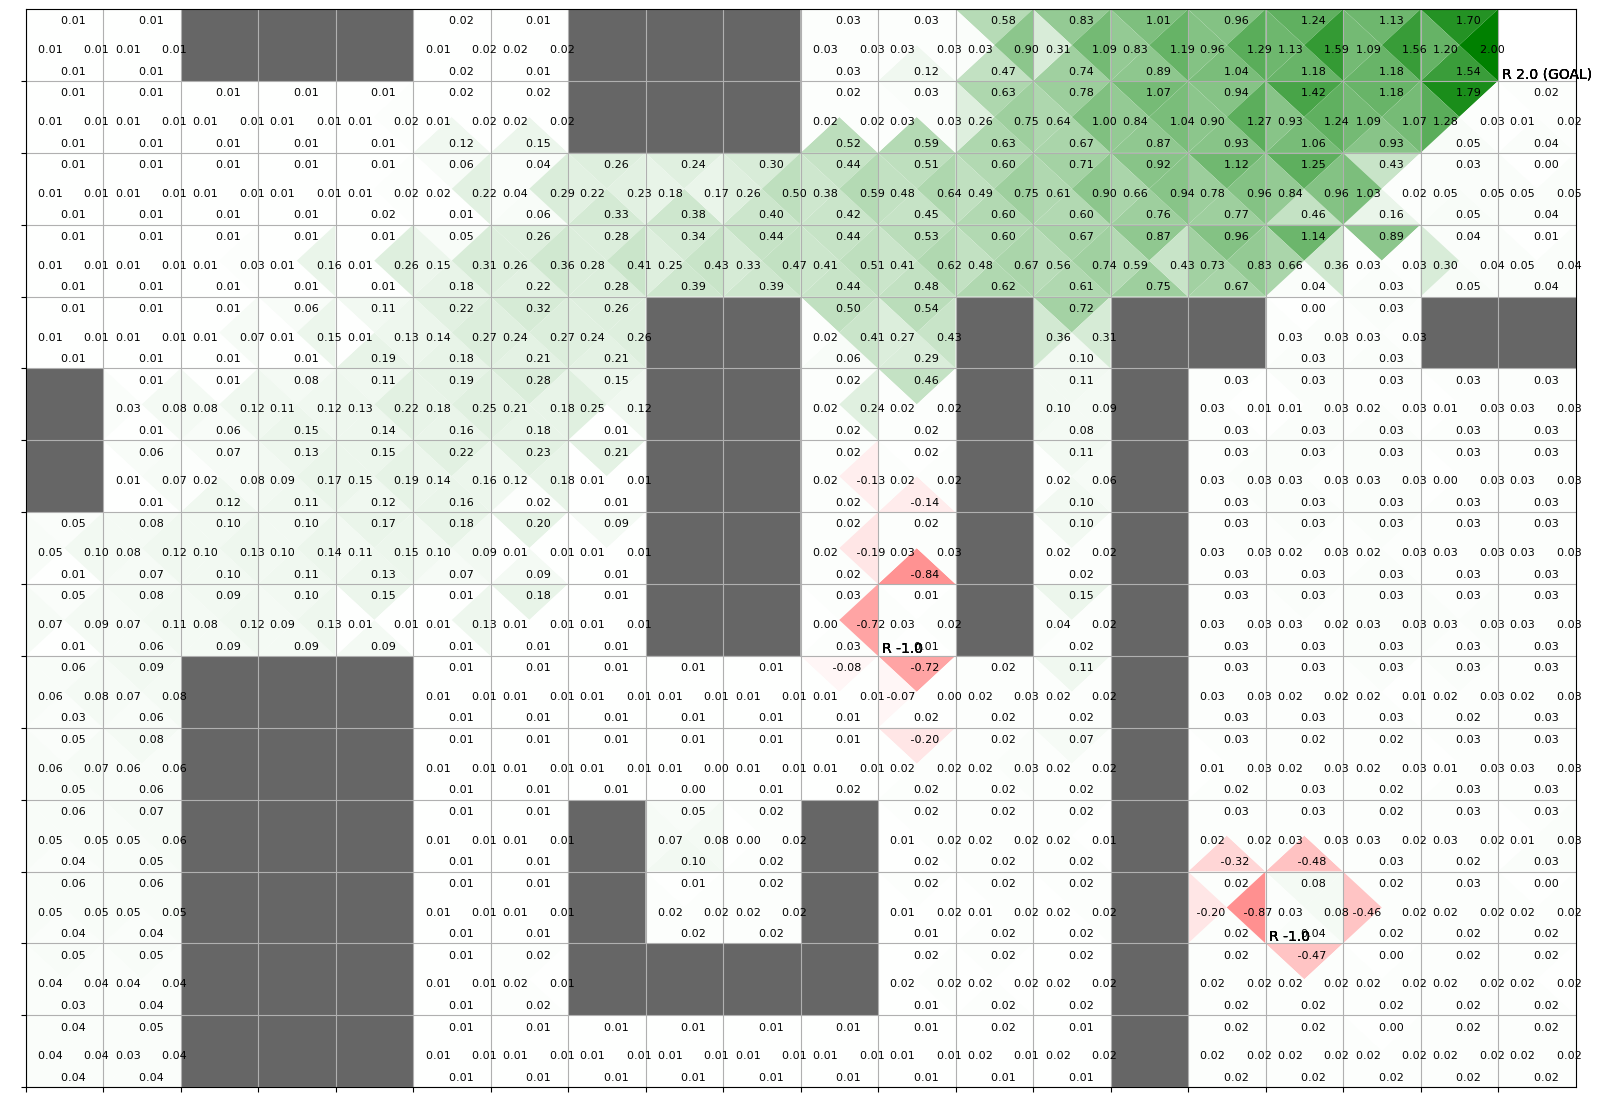

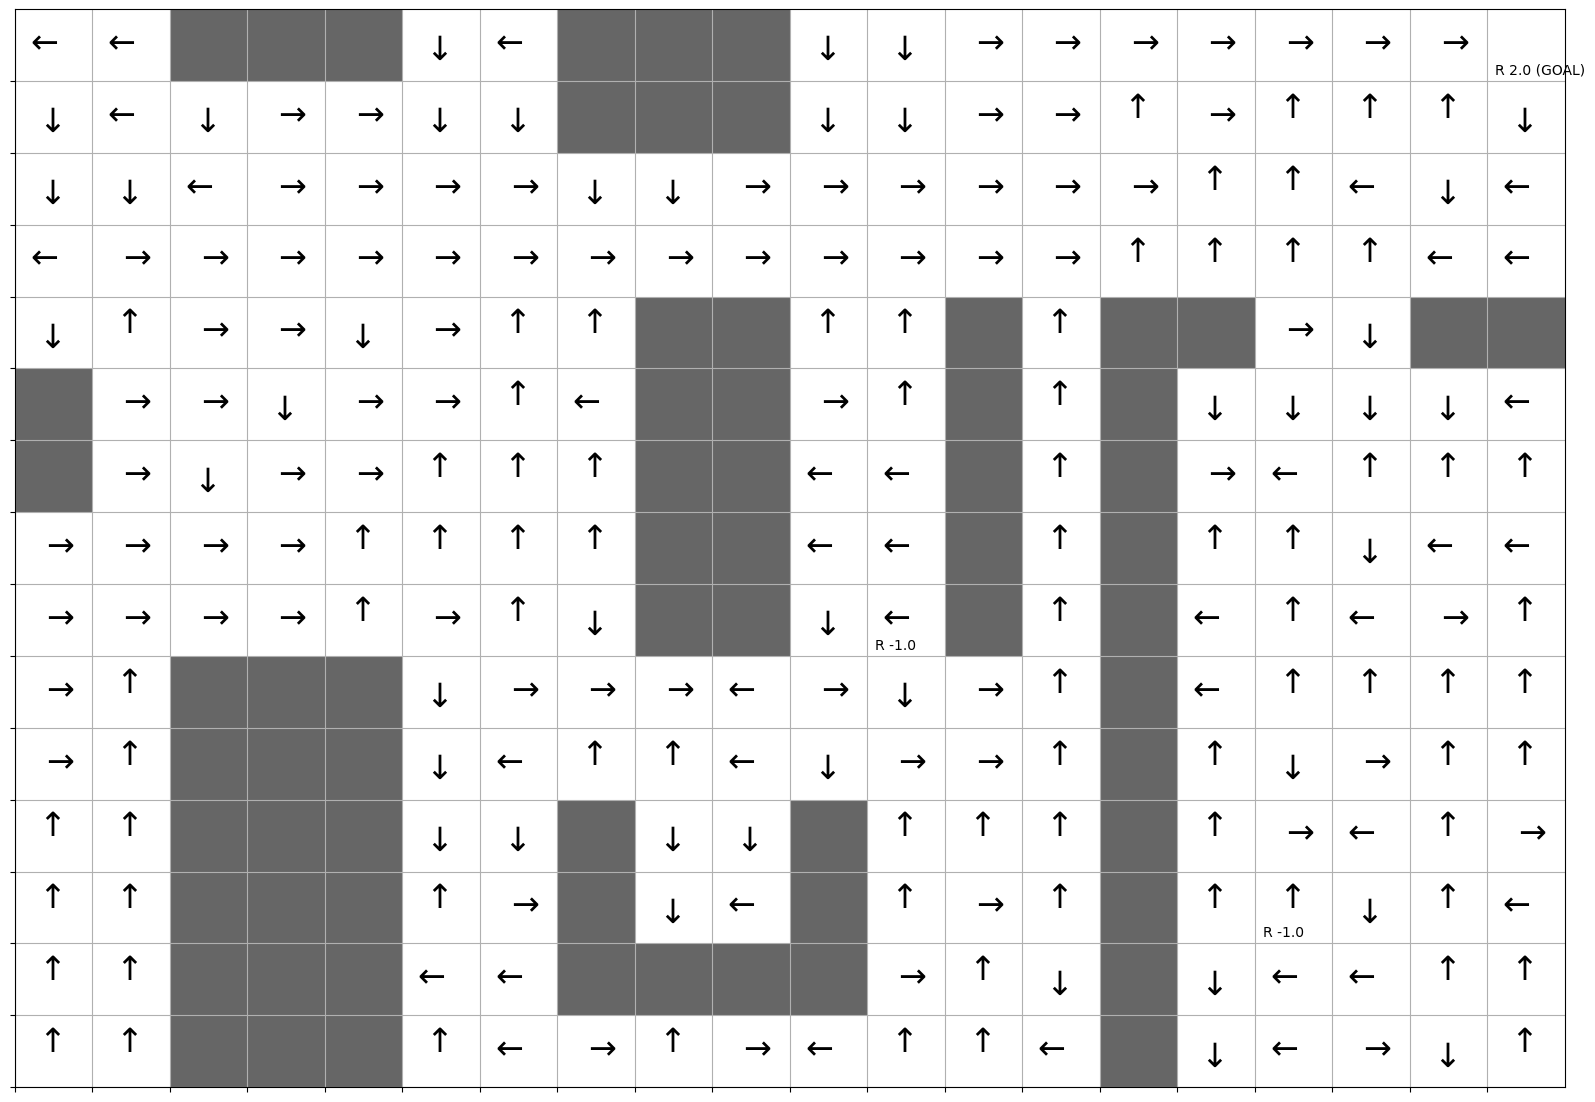

In [7]:
import os
import sys

if "common_expand" not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), "common_expand"))

from common_expand.gridworld import GridWorld


# 创建环境和agent
env = GridWorld()
agent = SarsaAgent(env)

# 训练agent
num_episodes = 2000

SARSA_training_data_file = "SARSA_training_data.csv"
reward_history = []
steps_history = []

for episode in range(num_episodes):
    state = agent.env.reset()
    action = agent.get_action(state)
    total_reward = 0
    steps = 0
    
    while True:
        next_state, reward, done = agent.env.step(action)
        next_action = agent.get_action(next_state)
        
        # 更新Q函数
        agent.update(state, action, reward, next_state, next_action, done)
        
        state, action = next_state, next_action
        total_reward += reward
        steps += 1
        
        if done:
            break
    
    # 记录
    reward_history.append(total_reward)
    steps_history.append(steps)

    # 保存训练数据
    if not os.path.exists(SARSA_training_data_file):
        with open(SARSA_training_data_file, "w") as f:
            f.write("episode,total_reward,step_count,epsilon\n")

    with open(SARSA_training_data_file, "a") as f:
        f.write(f"{episode},{total_reward},{steps},{agent.epsilon}\n")
    
    # 每100轮打印一次进度
    if episode % 100 == 0:
        print(f"Episode {episode}: total reward = {total_reward}, steps = {steps}")

# 获取训练结果
policy = agent.get_policy()
value_function = agent.get_value_function()

print(value_function)
print(policy)


# 将 Q-table 转换为 {(state, action): q_value} 的格式
q_for_render = {
    (state, action): agent.Q[(state, action)]
    for state in env.states()
    for action in env.action_space
}

# 可视化结果
env.render_q(q_for_render)


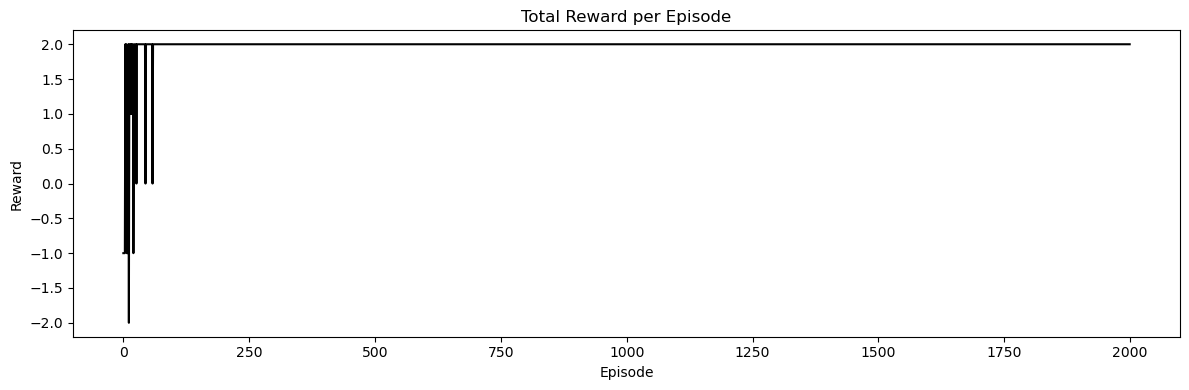

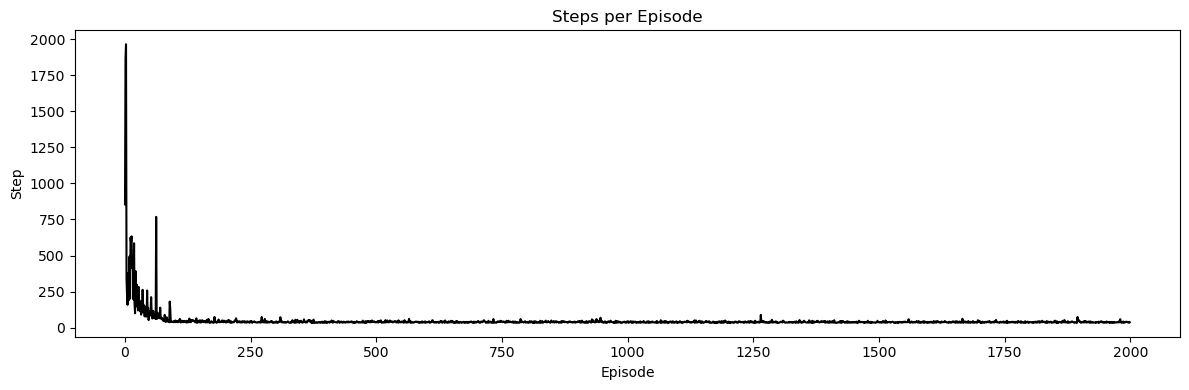

In [8]:

from turtle import color
from matplotlib import pyplot as plt

# 绘制学习曲线
plt.figure(figsize=(12, 4))
plt.plot(reward_history, color="black")
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.tight_layout() 
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(steps_history, color="black")
plt.title("Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Step")
plt.tight_layout()
plt.show()


In [9]:
# 打印最优策略
print("\nOptimal Policy:")
for state in env.states():
    if state == env.goal_state:
        print(f"State {state}: GOAL")
    elif state in env.wall_state:
        print(f"State {state}: WALL")
    else:
        actions = policy[state]
        best_action = np.argmax([actions[a] for a in env.actions()])
        action_name = env.action_meaning[best_action]
        print(f"State {state}: {action_name}")


Optimal Policy:
State (0, 0): LEFT
State (0, 1): LEFT
State (0, 2): WALL
State (0, 3): WALL
State (0, 4): WALL
State (0, 5): DOWN
State (0, 6): LEFT
State (0, 7): WALL
State (0, 8): WALL
State (0, 9): WALL
State (0, 10): DOWN
State (0, 11): DOWN
State (0, 12): RIGHT
State (0, 13): RIGHT
State (0, 14): RIGHT
State (0, 15): RIGHT
State (0, 16): RIGHT
State (0, 17): RIGHT
State (0, 18): RIGHT
State (0, 19): GOAL
State (1, 0): DOWN
State (1, 1): LEFT
State (1, 2): DOWN
State (1, 3): RIGHT
State (1, 4): RIGHT
State (1, 5): DOWN
State (1, 6): DOWN
State (1, 7): WALL
State (1, 8): WALL
State (1, 9): WALL
State (1, 10): DOWN
State (1, 11): DOWN
State (1, 12): RIGHT
State (1, 13): RIGHT
State (1, 14): UP
State (1, 15): RIGHT
State (1, 16): UP
State (1, 17): UP
State (1, 18): UP
State (1, 19): DOWN
State (2, 0): DOWN
State (2, 1): DOWN
State (2, 2): LEFT
State (2, 3): RIGHT
State (2, 4): RIGHT
State (2, 5): RIGHT
State (2, 6): RIGHT
State (2, 7): DOWN
State (2, 8): DOWN
State (2, 9): RIGHT
Stat

In [10]:
import numpy as np


# 测试函数
def test_policy_success_rate(env, policy, num_episodes=1000):
    success_steps_count = list()
    max_step = 300
    success_count = 0
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        step_count = 0
        while not done and step_count < max_step:
            actions = policy[state]
            action = np.argmax([actions[a] for a in env.actions()])
            state, reward, done = env.step(action)
            step_count += 1
            # 假设奖励为 1 表示成功
            if reward > 0:
                success_count += 1
                success_steps_count.append(step_count)
                break
    avg_succ_step = np.mean(success_steps_count)
    success_rate = success_count / num_episodes
    return success_rate, avg_succ_step

succ_rate, avg_succ_step = test_policy_success_rate(env, policy)
print("成功率:", succ_rate, "平均完成步数: ", avg_succ_step)


成功率: 1.0 平均完成步数:  33.0
